In [2]:
#Angelica Seon Mee Joo
import io 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import requests 
url = 'https://github.com/vinc3creed/datasciencecoursera/raw/master/Advertising.csv'
read_data=requests.get(url).content
read_data

b'"","TV","Radio","Newspaper","Sales"\r\n"1",230.1,37.8,69.2,22.1\r\n"2",44.5,39.3,45.1,10.4\r\n"3",17.2,45.9,69.3,9.3\r\n"4",151.5,41.3,58.5,18.5\r\n"5",180.8,10.8,58.4,12.9\r\n"6",8.7,48.9,75,7.2\r\n"7",57.5,32.8,23.5,11.8\r\n"8",120.2,19.6,11.6,13.2\r\n"9",8.6,2.1,1,4.8\r\n"10",199.8,2.6,21.2,10.6\r\n"11",66.1,5.8,24.2,8.6\r\n"12",214.7,24,4,17.4\r\n"13",23.8,35.1,65.9,9.2\r\n"14",97.5,7.6,7.2,9.7\r\n"15",204.1,32.9,46,19\r\n"16",195.4,47.7,52.9,22.4\r\n"17",67.8,36.6,114,12.5\r\n"18",281.4,39.6,55.8,24.4\r\n"19",69.2,20.5,18.3,11.3\r\n"20",147.3,23.9,19.1,14.6\r\n"21",218.4,27.7,53.4,18\r\n"22",237.4,5.1,23.5,12.5\r\n"23",13.2,15.9,49.6,5.6\r\n"24",228.3,16.9,26.2,15.5\r\n"25",62.3,12.6,18.3,9.7\r\n"26",262.9,3.5,19.5,12\r\n"27",142.9,29.3,12.6,15\r\n"28",240.1,16.7,22.9,15.9\r\n"29",248.8,27.1,22.9,18.9\r\n"30",70.6,16,40.8,10.5\r\n"31",292.9,28.3,43.2,21.4\r\n"32",112.9,17.4,38.6,11.9\r\n"33",97.2,1.5,30,9.6\r\n"34",265.6,20,0.3,17.4\r\n"35",95.7,1.4,7.4,9.5\r\n"36",290.7,4.1,8.5

In [4]:
data=pd.read_csv(io.StringIO(read_data.decode('utf-8')))
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
#Data cleaning
data.isnull().sum()*100/data.shape[0]

Unnamed: 0    0.0
TV            0.0
Radio         0.0
Newspaper     0.0
Sales         0.0
dtype: float64

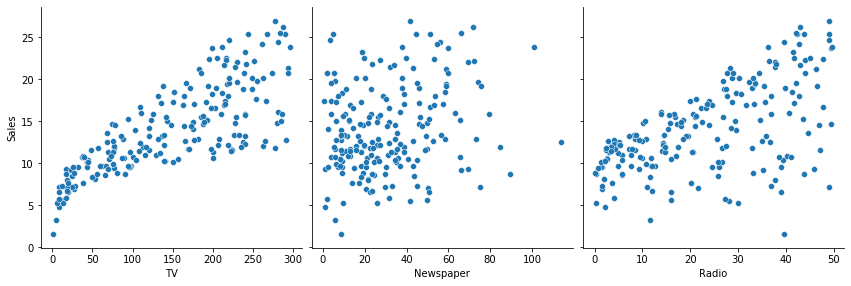

In [27]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

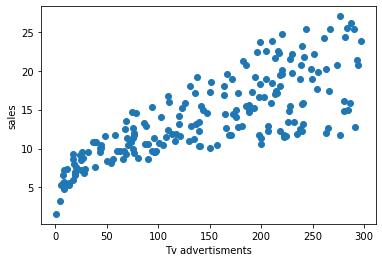

In [28]:
X = data.iloc[:, 1].values
y = data.iloc[:, 4].values
plt.scatter(X,y)
plt.xlabel('Tv advertisments')
plt.ylabel('sales')
plt.show()

In [29]:

m = 0
c = 0 
L = 0.00001
epochs = 50 
n = float(len(X)) 
for i in range (epochs):
    ypred = m*X + c 
    dm = (-2/n) * sum(X * (y -ypred)) 
    dc = (-2/n) * sum(y - ypred)

m = m - L *dm 
c = c - L *dc

print (m,c)

0.048210834 0.00028045000000000007


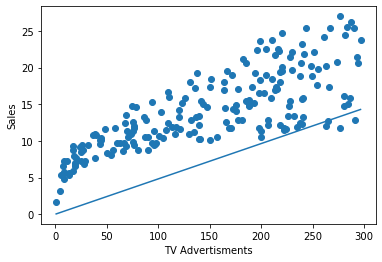

In [30]:
ypred = m*X + c
plt.scatter(X,y)
plt.xlabel("TV Advertisments")
plt.ylabel("Sales")
plt.plot([min(X), max(X)], [min(ypred), max(ypred)])
plt.show()

In [38]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [41]:
lml = smf.ols(formula = 'Sales ~ TV', data=data).fit()
lml.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [43]:
features_cols = ['TV']
X = data[features_cols]
y = data.Sales
lm2 = LinearRegression()
lm2.fit(X,y)
print(lm2.intercept_)
print(lm2.coef_)

7.032593549127695
[0.04753664]


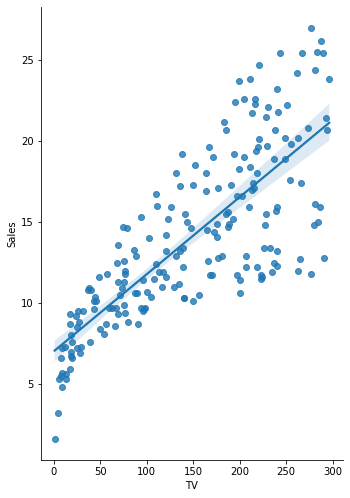

In [44]:
sns.pairplot(data, x_vars=['TV'],y_vars='Sales', height=7, aspect=0.7, kind='reg')

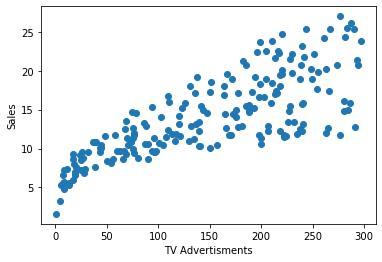

In [45]:
XX=data['TV']
Yy=data['Sales']
plt.scatter(X,y)
plt.xlabel('TV Advertisments')
plt.ylabel('Sales')
plt.show()

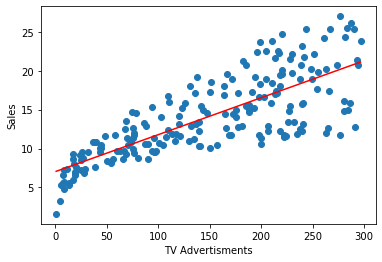

In [46]:
y_predx = lm2.coef_*XX + lm2.intercept_

plt.scatter(XX, Yy)
plt.xlabel('TV Advertisments')
plt.ylabel('Sales')
plt.plot([min(XX), max(XX)], [min(y_predx), max(y_predx)], color='red')
plt.show()